<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Modelo del rendimiento de una cuenta de ahorro
 </font> </center>

<img style="center" src="https://static.pexels.com/photos/9660/business-money-pink-coins.jpg" width="500px" height="200px" alt="atom"/>

> **¿Tiene el dinero el mismo valor a lo largo del tiempo?** La respuesta es *no*. Todos lo hemos vivido. 

> Dos situaciones básicas:
1. <font color=blue>Inflación</font>: ¿Cuánto dinero necesitabas para comprar unas papas y un refresco hace 10 años? ¿Cuánto necesitas hoy?
2. <font color=blue>Interés</font>: no es lo mismo tener $\$10000$ MXN disponibles hoy a recibir $\$10000$ MXN en un año, pues los primeros pueden ser invertidos en un negocio o una cuenta bancaria para generar *interés*. Por lo tanto los $\$10000$ MXN disponibles hoy valen más que los $\$10000$ MXN que se recibirán en un año.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)

Referencias:
- http://www.sympy.org
- http://matplotlib.org
- http://www.numpy.org
- http://ipywidgets.readthedocs.io/en/latest/index.html

___
## Interés
Nos centraremos en como cambia el valor del dinero en el tiempo debido al **interés**. Existen dos tipos:

### Capitalización por interés simple
Este tipo de interés se calcula <font color=red>única y exclusivamente sobre la cantidad original que se invirtió</font>. Como consecuencia, el interés generado no forma parte del dinero que se invierte, es decir, los <font color=blue>intereses no ganan intereses</font>.

Suponga que se tiene un capital inicial $C_0$ y se invierte a un plazo de $k$ periodos (pueden ser meses, trimestres, semestres, años...) a una tasa de **interés simple** por periodo $i$. Al final del primer periodo, el capital $C_1$ que se obtiene es:

$$C_1=C_0+iC_0=C_0(1+i).$$

De la misma manera, como el interés solo se calcula sobre el capital inicial, al final del segundo periodo, el capital $C_2$ que se obtiene es:

$$C_2=C_1+iC_0=C_0+iC_0+iC_0=C_0(1+2i).$$

Así, al final del $k-$ésimo periodo, el capital $C_k$ que se obtiene es:

$$C_k=C_{k-1}+iC_0=C_0+kiC_0=C_0(1+ki).$$

> **Ejemplo.** Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés simple del 0.8% mensual. 

> Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [1]:
# Librería para cálculo numérico
import numpy as np

In [2]:
# Valores dados en el enunciado
C0 = 10000
Ck = 11000
i = 0.008

In [4]:
# Despejamos k tal que C_k=meta
k = np.ceil((Ck / C0 - 1) / i)  # Función techo (ceil): encuentra el entero superior más cercano
k

13.0

In [8]:
type(k)

numpy.float64

In [10]:
type(k.astype(int))

numpy.int64

In [5]:
# Imprimimos respuesta en pantalla
print(f"Para llegar a la meta de {Ck} con un capital inicial de {C0} a una tasa de {i} mensual "
      f"se necesitan {k} meses. El dinero al finalizar los {k} meses es: {C0 * (1 + k * i)}.")

Para llegar a la meta de 11000 con un capital inicial de 10000 a una tasa de 0.008 mensual se necesitan 13.0 meses. El dinero al finalizar los 13.0 meses es: 11040.000000000002.


> <font color=blue>**Actividad.**</font>
> - ¿Qué pasa si el interés no es del 0.8% mensual sino del 1% mensual?
> - ¿Qué pasa si la meta no son $\$11000$ MXN si no $\$12000$ MXN?

In [ ]:
# Solución


> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [6]:
# Librerías para gráficos
import matplotlib.pyplot as plt
# Para que se muestren las gráficas en la misma ventana
%matplotlib inline
# Librería para widgets de python interactivo
from ipywidgets import *

Explicar la siguiente función

In [11]:
# Función de gráficos de interés simple
def interes_simple(C_0, meta, i):
    # Despejamos k
    k = np.ceil((meta / C_0 - 1) / i)  # Notar el uso de la función ceil
    k = k.astype(int)  # Conversión a entero
    C_k = C_0 * (1 + k * i)  # Cálculo del capital al final del periodo k
    C_k = round(C_k, 2)  # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0, k, k + 1)               
    # Vector de capitales por periodo
    CC = C_0 * (1 + kk * i)
    # Gráfico
    plt.figure(num=1)  # Figura 1
    plt.clf()  # Borrar lo que contenga la figura
    plt.plot(kk, CC,'*',linewidth=3)  # Se grafica la evolución de los capitales
    plt.plot(kk, meta * np.ones(k + 1), '--k')  # Se grafica la meta
    plt.xlabel('k')  # Etiqueta eje x
    plt.ylabel('C_k')  # Etiqueta eje y
    plt.grid()  # Malla en la gráfica
    plt.show()  # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")

In [17]:
interact_manual(interes_simple, 
                C_0=fixed(10000),
                meta=(10000, 20000, 100),
                i=fixed(0.008))

interactive(children=(IntSlider(value=15000, description='meta', max=20000, min=10000, step=100), Button(descr…

<function __main__.interes_simple(C_0, meta, i)>

Como se esperaba, el capital en el $k-$ésimo periodo $C_k=C_0(1+ki)$ crece linealmente con $k$.

### Capitalización por interés compuesto
El capital que genera el interés simple permanece constante todo el tiempo de duración de la inversión. En cambio, el que produce el interés compuesto en un periodo se <font color=red>convierte en capital en el siguiente periodo</font>. Esto es, el interés generado al final de un periodo <font color=blue>se reinvierte para el siguiente periodo para también producir interés</font>.

Suponga que se tiene un capital inicial $C_0$, y se va a ceder el uso de este capital por un periodo de tiempo determinado a una tasa de interés $i$. El capital que se obtiene al final del primer periodo $C_1$ se puede calcular por

$$C_1=C_0(1+i).$$ 

Si la anterior suma se vuelve a ceder a la misma tasa de interés, al final del periodo dos el capital $C_2$ es 

$$C_2=C_1(1+i)=C_0(1+i)^2.$$

Si se repite el anterior proceso $k$ veces, el capital al final del $k-$ésimo periodo $C_k$ es 

$$C_k=C_{k-1}(1+i)=C_0(1+i)^k.$$

**Referencia**:
- https://es.wikipedia.org/wiki/Inter%C3%A9s_compuesto.

> **Ejemplo.** Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del 0.8% mensual. 

> Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

> Muestre una gráfica que ilustre la situación.

In [14]:
def interes_compuesto(C_0, meta, i):
    # Despejamos k
    k = np.ceil(np.log(meta / C_0) / np.log(1 + i))
    k = k.astype(int)
    C_k = C_0 * (1 + i)**k  # Cálculo del capital al final del periodo k
    C_k = round(C_k, 2)  # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0, k, k + 1)
    # Vector de capitales por periodo
    CC = C_0 * (1 + i)**kk
    # Gráfico
    plt.figure(num=1)  # Figura 1
    plt.clf()  # Borrar lo que contenga la figura
    plt.plot(kk, CC, '*', linewidth=3)  # Se grafica la evolución de los capitales
    plt.plot(kk, meta * np.ones(k + 1), '--k')  # Se grafica la meta
    plt.xlabel('k')  # Etiqueta eje x
    plt.ylabel('C_k')  # Etiqueta eje y
    plt.grid()  # Malla en la gráfica
    plt.show()  # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")

In [20]:
interact_manual(interes_compuesto, 
                C_0=fixed(10000), 
                meta=(10000, 20000, 100), 
                i=fixed(0.008))

interactive(children=(IntSlider(value=15000, description='meta', max=20000, min=10000, step=100), Button(descr…

<function __main__.interes_compuesto(C_0, meta, i)>

El capital en el $k-$ésimo periodo $C_k=C_0(1+i)^k$ crece de manera exponencial con $k$.

> <font color=blue>**Actividad.**</font>
> - Modificar el código anterior para dejar fija la meta de ahorro y variar la tasa de interés compuesta.

### Capitalización continua de intereses
La capitalización continua se considera un tipo de capitalización compuesta, en la que a cada instante de tiempo $t$ se se capitalizan los intereses. Es decir, la frecuencia de capitalización es infinita (o, equivalentemente, el periodo de capitalización tiende a cero).

Suponga que se tiene un capital inicial $C_0$, y que el capital acumulado en el tiempo $t$ es $C(t)$. Queremos saber cuanto será el capital pasado un periodo de tiempo $\Delta t$, dado que la tasa de interés efectiva para este periodo de tiempo es $i$. De acuerdo a lo anterior tenemos

$$C(t+\Delta t)=C(t)(1+i)=C(t)(1+r\Delta t),$$

donde $r=\frac{i}{\Delta t}$ es la tasa de interés instantánea. Manipulando la anterior expresión, obtenemos

$$\frac{C(t+\Delta t)-C(t)}{\Delta t}=r\; C(t).$$

Haciendo $\Delta t\to 0$, obtenemos la siguiente ecuación diferencial 

$$\frac{d C(t)}{dt}=r\; C(t),$$

sujeta a la condición inicial (monto o capital inicial) $C(0)=C_0$.

La anterior, es una ecuación diferencial lineal de primer orden, para la cual se puede calcular la *solución analítica*.

In [1]:
# Librería de cálculo simbólico
import sympy as sym
# Para imprimir en formato TeX
sym.init_printing(use_latex='mathjax')

In [2]:
# Símbolos t(para el tiempo) y r(para el interés instantáneo)
sym.var("t r")
# Función de capital
C = sym.Function('C')

In [28]:
# Ecuación diferencial
eq = sym.Eq(sym.Derivative(C(t), t) - r * C(t), 0)
# Mostrar ecuación
display(eq)
# Resolver
sym.dsolve(eq, C(t))

          d           
-r⋅C(t) + ──(C(t)) = 0
          dt          

           r⋅t
C(t) = C₁⋅ℯ   

con $C_1=C_0$.

La equivalencia entre la tasa de interés compuesta $i$ y la tasa de interés instantánea $r$ viene dada por

$$e^r=1+i.$$

___
¿Cómo podemos calcular la *solución numérica*?

> **Ejemplo.** Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del 0.8% mensual. 

> Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuánto tiempo se debe dejar invertido el dinero?

> Muestre una gráfica que ilustre la situación.

In [29]:
# Librerías para integración numérica
from scipy.integrate import odeint

In [30]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [34]:
# Modelo de capitalización continua
def cap_continua(C, t, r):
    return r * C

In [35]:
def interes_continuo(C_0, meta, r):
    # Despejamos t
    t = np.log(meta / C_0) / r
    # Vector de periodos
    tt = np.linspace(0, t, 100)
    # Vector de capitales por periodo
    CC = odeint(cap_continua, C_0, tt, args = (r,))
    # Gráfico
    plt.figure(num=1)  # Figura 1
    plt.clf()  # Borrar lo que contenga
    plt.plot(tt, CC, '-', linewidth=3)  # Se grafica la evolución de los capitales
    plt.plot(tt,meta*np.ones(len(tt)),'--k')  # Se grafica la meta
    plt.xlabel('t')  # Etiqueta eje x
    plt.ylabel('C(t)')  # Etiqueta eje y
    plt.grid()  # Malla en la gráfica
    plt.show()  # Mostrar la figura
    print("El tiempo que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", t, " meses.", sep="")

In [37]:
interact_manual(interes_continuo,
                C_0=fixed(10000),
                meta=(10000,12000,100),
                r=fixed(np.log(1+0.008)));

interactive(children=(IntSlider(value=11000, description='meta', max=12000, min=10000, step=100), Button(descr…

### Actividad. 
1. Resolver simbólicamente y numéricamente la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}; \quad x(0) = 1$$

In [8]:
# Símbolos t(para el tiempo) y r(para el interés instantáneo)
sym.var("t")
# Función de capital
x = sym.Function('x')
# Ecuacion diferencial
eq = sym.Eq(sym.Derivative(x(t), t) - x(t) / (t + 1), 0)
display(eq)

d           x(t)    
──(x(t)) - ───── = 0
dt         t + 1    

In [10]:
# Resolver
sym.dsolve(eq, x(t))

x(t) = C₁⋅(t + 1)

Despejamos la constante usando la condición inicial:

$$
1=x(0)=C_1(0 + 1)=C_1
$$

Finalmente, la solución es:

$$
x(t) = t + 1
$$

2. Obtener la solución numérica.

In [11]:
# Funcion a integrar
def fun(x, t):
    return x / (t + 1)

In [13]:
import numpy as np

In [14]:
# Condicion inicial
x0 = 1
# Vector de tiempo
t = np.linspace(0, 10)

In [15]:
from scipy.integrate import odeint

In [17]:
# Solucion numerica
sol = odeint(func=fun,
             y0=x0,
             t=t)

In [18]:
sol

array([[ 1.        ],
       [ 1.20408163],
       [ 1.40816327],
       [ 1.6122449 ],
       [ 1.81632653],
       [ 2.02040816],
       [ 2.2244898 ],
       [ 2.42857143],
       [ 2.63265306],
       [ 2.83673469],
       [ 3.04081633],
       [ 3.24489796],
       [ 3.44897959],
       [ 3.65306122],
       [ 3.85714286],
       [ 4.06122449],
       [ 4.26530612],
       [ 4.46938776],
       [ 4.67346939],
       [ 4.87755102],
       [ 5.08163265],
       [ 5.28571429],
       [ 5.48979592],
       [ 5.69387755],
       [ 5.89795918],
       [ 6.10204082],
       [ 6.30612245],
       [ 6.51020408],
       [ 6.71428571],
       [ 6.91836735],
       [ 7.12244898],
       [ 7.32653061],
       [ 7.53061224],
       [ 7.73469388],
       [ 7.93877551],
       [ 8.14285714],
       [ 8.34693878],
       [ 8.55102041],
       [ 8.75510204],
       [ 8.95918367],
       [ 9.16326531],
       [ 9.36734694],
       [ 9.57142857],
       [ 9.7755102 ],
       [ 9.97959184],
       [10

In [19]:
from matplotlib import pyplot as plt

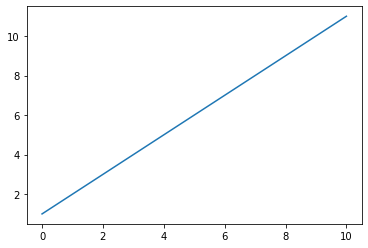

In [22]:
# Grafica x vs.t
plt.plot(t, sol[:, 0])

3. Comparar.

In [ ]:
# Grafica x vs.t


___
## Tabla de abonos
Como aplicación importante del concepto de interés compuesto se encuentra la creación de un modelo de cuenta de ahorro.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)
- http://pbpython.com/amortization-model.html

In [38]:
# Librería de análisis de datos
import pandas as pd
# Librería para manipulación de fechas
from datetime import date

In [39]:
# Datos para la cuenta de ahorro
Tasa_interes = 0.08  # 8% anual
Anos = 5
Abonos_ano = 12
Inicial = 50000
Meta = 100000
fecha_inicio = date(2021, 5, 1)

# Tasa interés por periodo
i = Tasa_interes / Abonos_ano  # Tasa de interés mensual
# Total de periodos
T = Anos * Abonos_ano  # 

# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
Abono = i * (Meta - Inicial * (1 + i)**T) / ((1 + i)**T - 1)

# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=T, freq='MS')
rng.name = "Fecha del abono"

# Columnas de abonos y extracto de cuenta en las fechas respectivas
df = pd.DataFrame(index=rng, columns=['Abono', 'Balance'], dtype='float')

# Para poner el indice con los periodos y no con las fechas
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Periodo"  # Columna correspondiente al periodo

# Los abonos son iguales
df["Abono"] = Abono

# Vector indizador de los periodos de los abonos
index_vector = np.arange(1,len(rng)+1)
# Extracto de la cuenta mes a mes
df["Balance"] = Inicial * (1 + i)**index_vector + Abono * (((1 + i)**index_vector - 1) / i)

# Redondear con dos cifras decimales
df = df.round(2)
df

# La siguiente solución es también válida. Sin embargo, evitar el uso de 'for'

#df.loc[1, "Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**1 + df.loc[1, "Abono"]

#for i in range(2, len(df)+1):
#    # Get the previous balance as well as current payments
#    prev_balance = df.loc[i-1, "Balance"]

#    df.loc[i, "Balance"] = prev_balance*(1+Tasa_interes/Abonos_ano)**1 + df.loc[i, "Abono"]

,Fecha del abono,Abono,Balance
Periodo,,,
1,2021-05-01,347.15,50680.49
2,2021-06-01,347.15,51365.51
3,2021-07-01,347.15,52055.10
4,2021-08-01,347.15,52749.29
5,2021-09-01,347.15,53448.10
6,2021-10-01,347.15,54151.57
7,2021-11-01,347.15,54859.74
8,2021-12-01,347.15,55572.62
9,2022-01-01,347.15,56290.26


In [42]:
df['Abono'].sum()

20829.000000000007

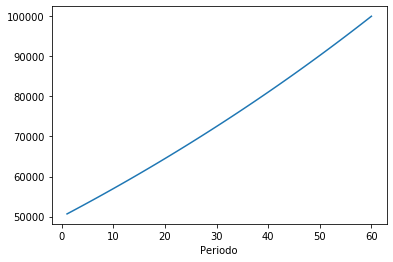

In [41]:
df['Balance'].plot();